In [1]:
import os
import sys
import logging
import torch
from torch.distributions import MultivariateNormal, Uniform, TransformedDistribution, SigmoidTransform
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
import emcee

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [4]:
from nnest import NestedSampler, MCMCSampler
from nnest.trainer import Trainer
from nnest.likelihoods import *
from nnest.priors import *
from nnest.distributions import GeneralisedNormal

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
def test(like, prior, model, nwalkers=40, init_chain=True, nested_samples=True, mcmc_steps=50, nested_fraction=0.01):
    np.random.seed(0)
    if nested_samples:
        init_samples, loglstar = like.uniform_sample(prior, 1000, nested_fraction)
    else:
        init_samples = like.sample(prior, 1000)
        loglstar = None
    model.train(init_samples, jitter=0.01)
    model.plot_samples(init_samples, plot_synthetic=False)
    sampler = MCMCSampler(like.x_dim, like, prior=prior, trainer=model, log_level=logging.INFO)
    for moves in [[(emcee.moves.KDEMove(), 1.0)], [(emcee.moves.StretchMove(), 1.0)]]:
        if init_chain:
            results = sampler._ensemble_sample(mcmc_steps, nwalkers, init_state=init_samples[0:nwalkers, :], 
                                               loglstar=loglstar, stats_interval=1, moves=moves)
        else:
            results = sampler._ensemble_sample(mcmc_steps, nwalkers, loglstar=loglstar, stats_interval=1, moves=moves)
        samples, latent_samples, derived_samples, loglikes, ncall = results
        fig, ax = plt.subplots(1, 2, figsize=(12,6))
        flat_samples = samples.reshape((-1, like.x_dim))
        flat_latent_samples = latent_samples.reshape((-1, like.x_dim))
        ax[0].scatter(flat_samples[:,0], flat_samples[:,1], c='r', s=5, alpha=0.5)
        ax[1].scatter(flat_latent_samples[:,0], flat_latent_samples[:,1], c='r', s=5, alpha=0.5)
        plt.show()
        fig, ax = plt.subplots(like.x_dim, 2, figsize=(10, like.x_dim))
        for i in range(like.x_dim):
            ax[i, 0].plot(samples[0,0:1000,i])
            ax[i, 1].plot(latent_samples[0,0:1000,i])
        plt.show()
        mc = MCSamples(samples=[samples[i, :, :].squeeze() for i in range(samples.shape[0])], 
                       loglikes=[-loglikes[i, :].squeeze() for i in range(loglikes.shape[0])])
        try:
            print(mc.getEffectiveSamples())
        except:
            pass
        print(ncall)

In [7]:
nwalkers = 100

In [8]:
prior = UniformPrior(2, -15, 15)
like = Eggbox(2)

[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
        

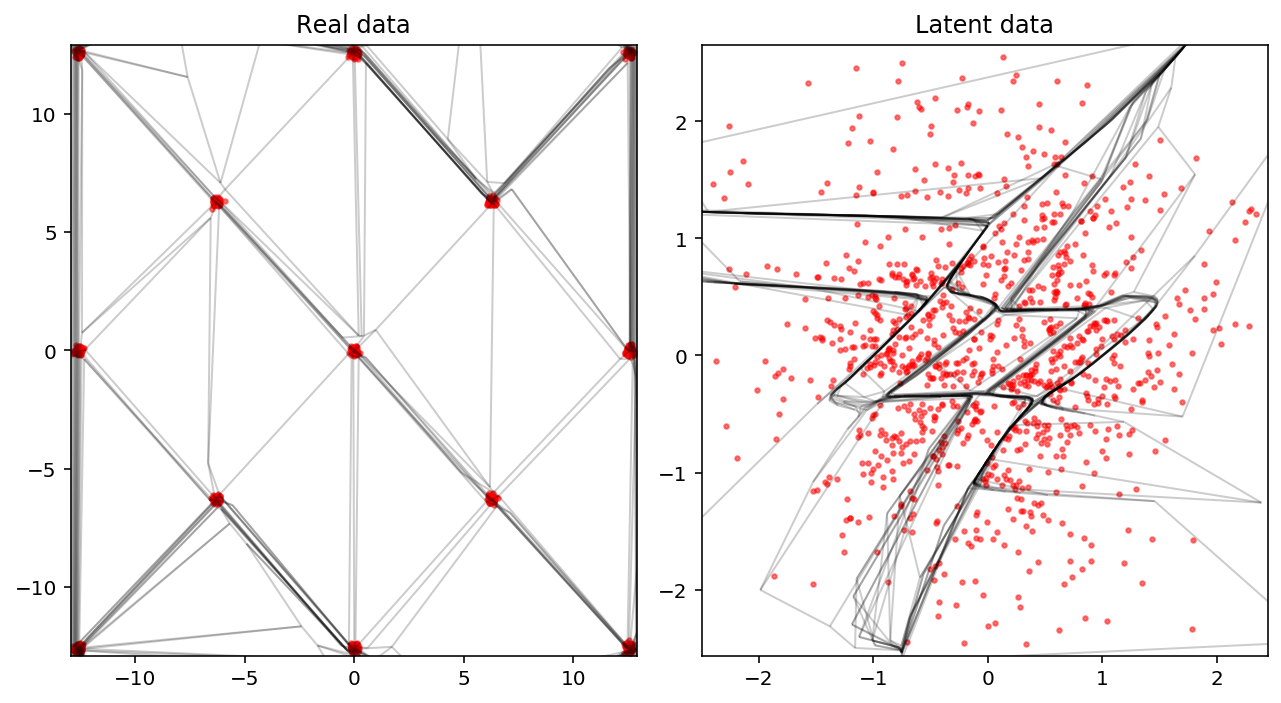

Creating directory for new run logs/test/run347
[nnest.sampler] [INFO] Num base params [2]
[nnest.sampler] [INFO] Num derived params [0]
[nnest.sampler] [INFO] Total params [2]
[nnest.sampler] [INFO] Step [2] acceptance [0.5300] min ESS [1.3990] max ESS [1.5121] average jump [0.9414]
[nnest.sampler] [INFO] Step [3] acceptance [0.5650] min ESS [1.7771] max ESS [1.8758] average jump [0.9322]
[nnest.sampler] [INFO] Step [4] acceptance [0.5433] min ESS [1.9974] max ESS [2.3895] average jump [0.9247]
[nnest.sampler] [INFO] Step [5] acceptance [0.5200] min ESS [2.3426] max ESS [2.5371] average jump [0.8894]
[nnest.sampler] [INFO] Step [6] acceptance [0.5200] min ESS [2.5732] max ESS [2.7920] average jump [0.8719]
[nnest.sampler] [INFO] Step [7] acceptance [0.5083] min ESS [2.9654] max ESS [3.1808] average jump [0.8692]
[nnest.sampler] [INFO] Step [8] acceptance [0.5100] min ESS [3.3529] max ESS [3.6595] average jump [0.8710]
[nnest.sampler] [INFO] Step [9] acceptance [0.5012] min ESS [3.6727

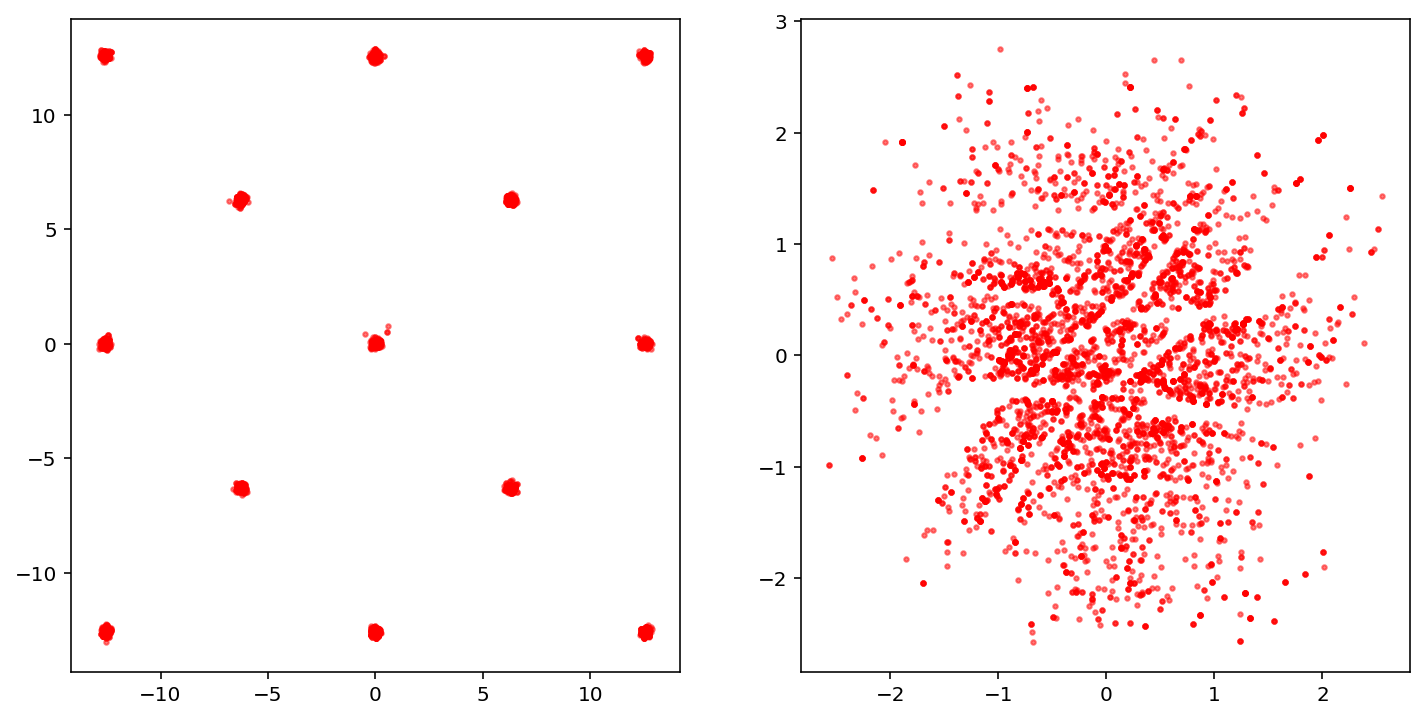

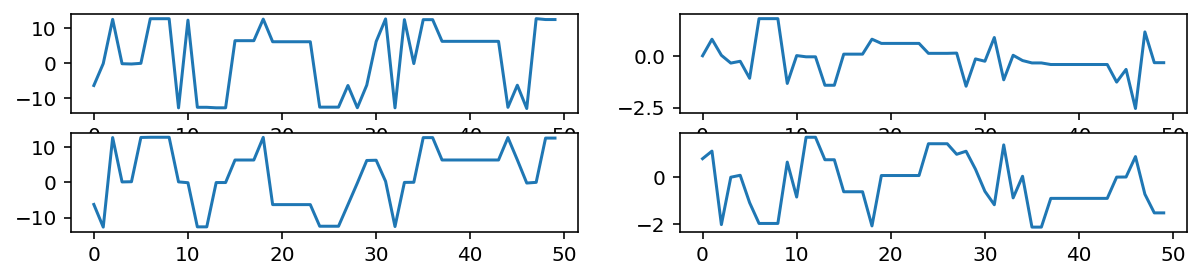

Removed no burn in
1752.2551393024996
5100
[nnest.sampler] [INFO] Step [2] acceptance [0.4800] min ESS [1.0374] max ESS [1.0686] average jump [0.2512]
[nnest.sampler] [INFO] Step [3] acceptance [0.4900] min ESS [1.0572] max ESS [1.0952] average jump [0.2174]
[nnest.sampler] [INFO] Step [4] acceptance [0.4667] min ESS [1.0793] max ESS [1.1152] average jump [0.2018]
[nnest.sampler] [INFO] Step [5] acceptance [0.4650] min ESS [1.0937] max ESS [1.1484] average jump [0.2009]
[nnest.sampler] [INFO] Step [6] acceptance [0.4660] min ESS [1.1139] max ESS [1.1835] average jump [0.1981]
[nnest.sampler] [INFO] Step [7] acceptance [0.4750] min ESS [1.1309] max ESS [1.2125] average jump [0.2036]
[nnest.sampler] [INFO] Step [8] acceptance [0.4686] min ESS [1.1448] max ESS [1.2322] average jump [0.2002]
[nnest.sampler] [INFO] Step [9] acceptance [0.4688] min ESS [1.1597] max ESS [1.2445] average jump [0.1990]
[nnest.sampler] [INFO] Step [10] acceptance [0.4811] min ESS [1.1739] max ESS [1.2605] averag

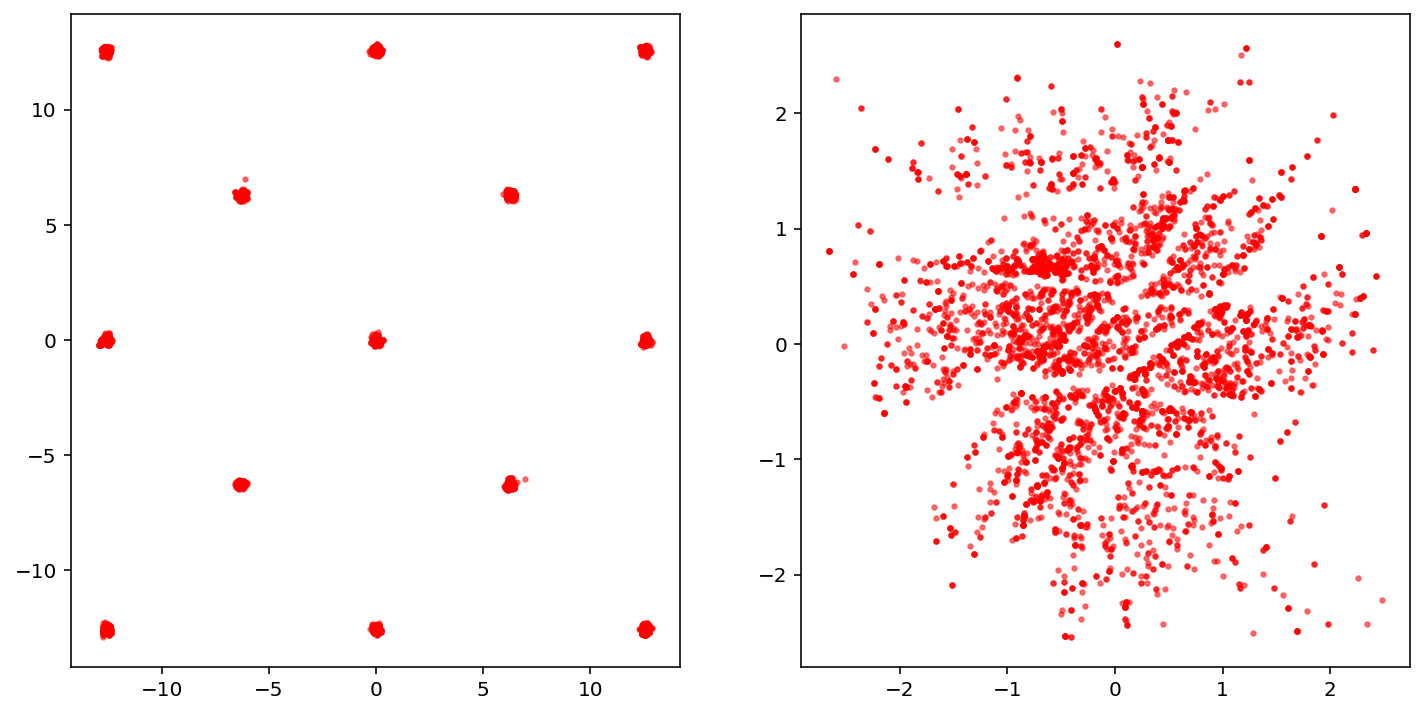

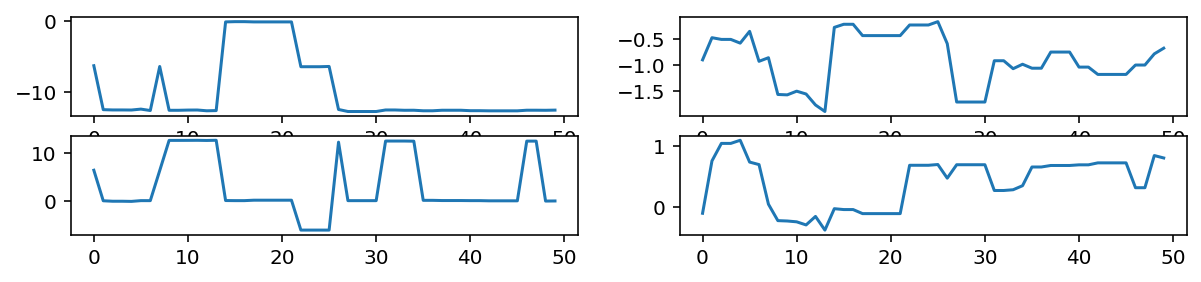

Removed no burn in
191.21471512820474
5100


In [9]:
model = Trainer(like.x_dim, flow='spline', learning_rate=0.001)
test(like, prior, model, init_chain=False, nwalkers=nwalkers, nested_samples=False)

In [10]:
prior = UniformPrior(2, -2, 10)
like = Rosenbrock(2)

[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
        

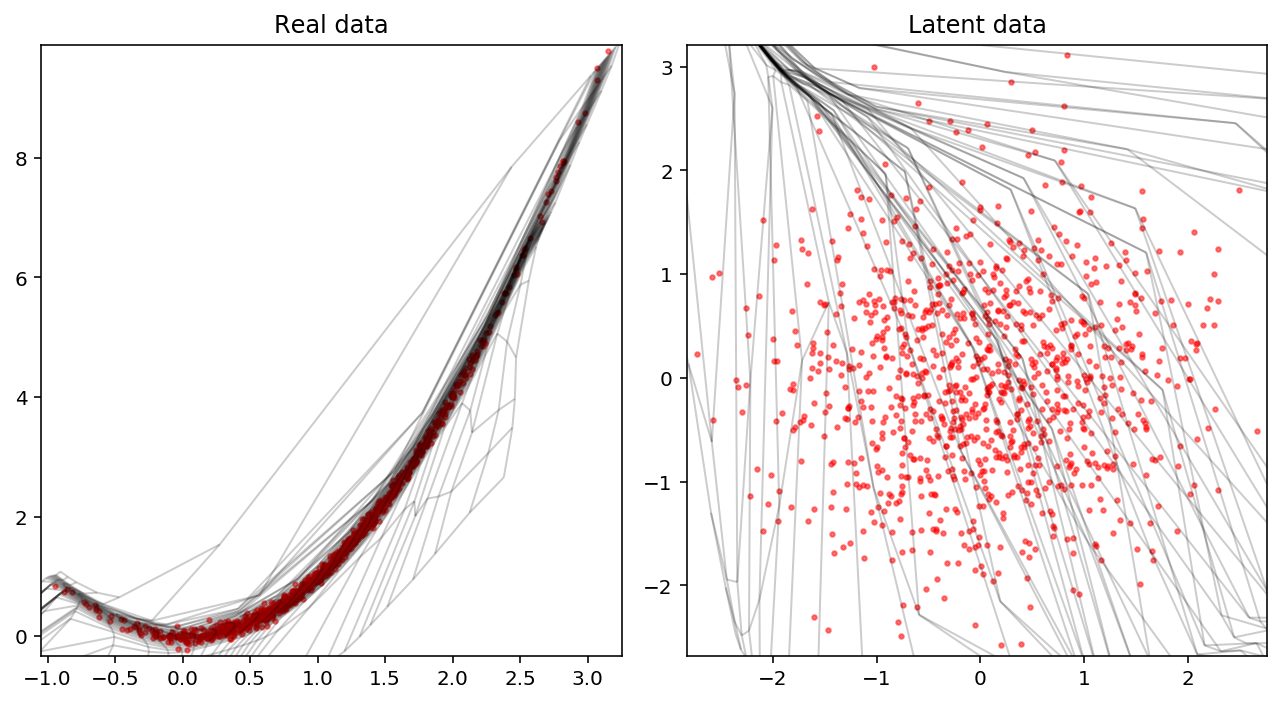

Creating directory for new run logs/test/run348
[nnest.sampler] [INFO] Num base params [2]
[nnest.sampler] [INFO] Num derived params [0]
[nnest.sampler] [INFO] Total params [2]
[nnest.sampler] [INFO] Step [2] acceptance [0.6500] min ESS [1.4047] max ESS [1.4475] average jump [0.9474]
[nnest.sampler] [INFO] Step [3] acceptance [0.7150] min ESS [1.9058] max ESS [2.1450] average jump [1.0942]
[nnest.sampler] [INFO] Step [4] acceptance [0.6700] min ESS [2.3368] max ESS [2.4432] average jump [1.0433]
[nnest.sampler] [INFO] Step [5] acceptance [0.6875] min ESS [2.8750] max ESS [2.8907] average jump [1.0808]
[nnest.sampler] [INFO] Step [6] acceptance [0.7120] min ESS [3.3710] max ESS [3.7197] average jump [1.1167]
[nnest.sampler] [INFO] Step [7] acceptance [0.7317] min ESS [4.0379] max ESS [4.3378] average jump [1.1446]
[nnest.sampler] [INFO] Step [8] acceptance [0.7257] min ESS [4.5481] max ESS [5.2630] average jump [1.1376]
[nnest.sampler] [INFO] Step [9] acceptance [0.7288] min ESS [5.0720

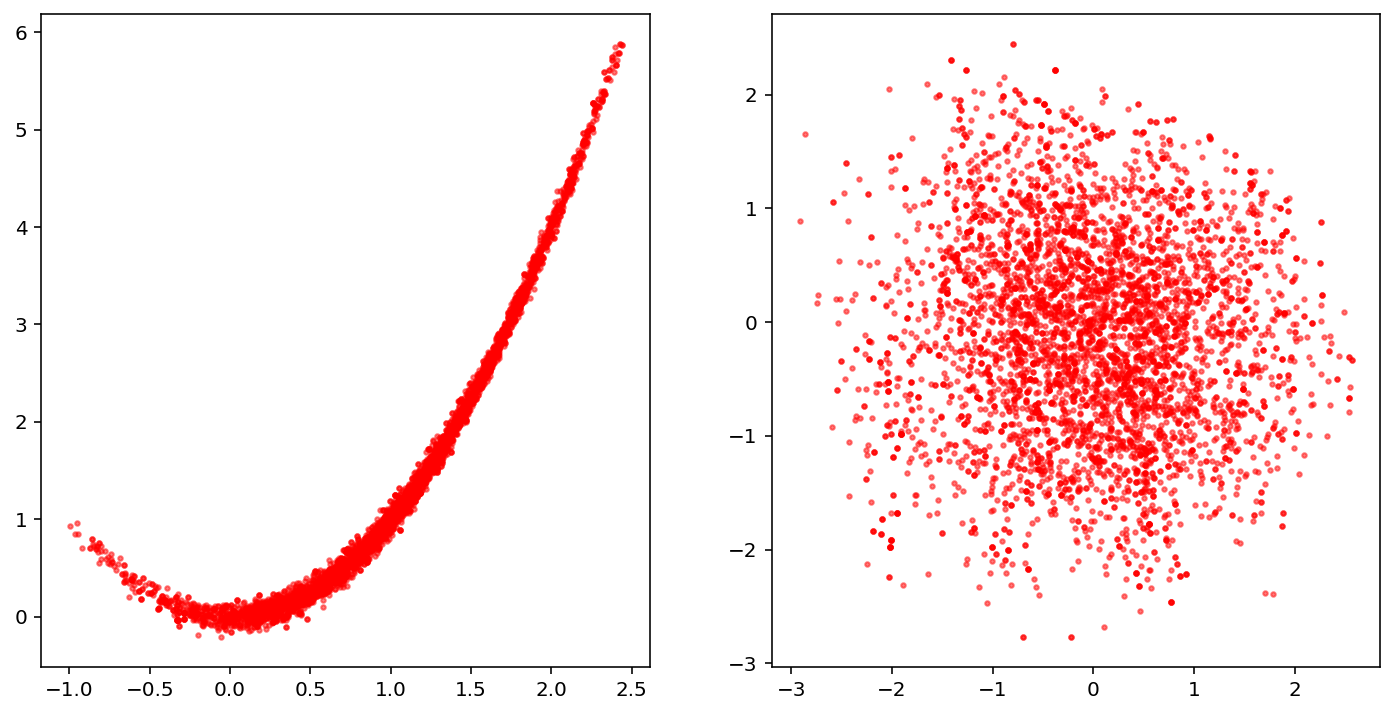

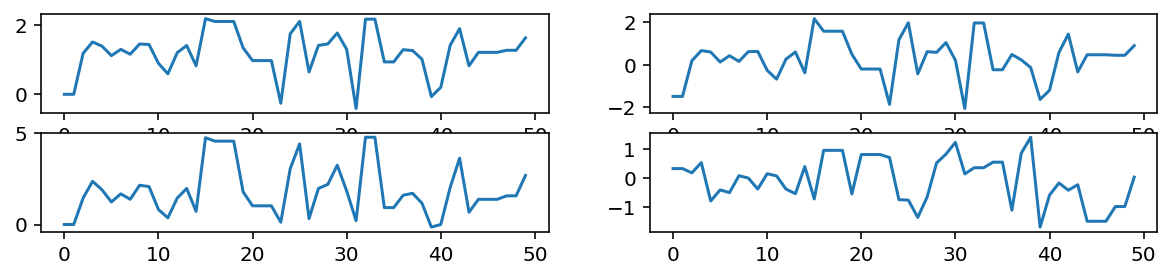

Removed no burn in
2873.3060517690506
5100


/Users/adammoss/opt/anaconda3/envs/nnest/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


[nnest.sampler] [INFO] Step [2] acceptance [0.7300] min ESS [1.0806] max ESS [1.1022] average jump [0.2903]
[nnest.sampler] [INFO] Step [3] acceptance [0.7750] min ESS [1.1279] max ESS [1.1563] average jump [0.3028]
[nnest.sampler] [INFO] Step [4] acceptance [0.7800] min ESS [1.1827] max ESS [1.2023] average jump [0.3201]
[nnest.sampler] [INFO] Step [5] acceptance [0.7800] min ESS [1.2161] max ESS [1.2534] average jump [0.3226]
[nnest.sampler] [INFO] Step [6] acceptance [0.7540] min ESS [1.2467] max ESS [1.2838] average jump [0.3153]
[nnest.sampler] [INFO] Step [7] acceptance [0.7467] min ESS [1.2706] max ESS [1.3150] average jump [0.3094]
[nnest.sampler] [INFO] Step [8] acceptance [0.7443] min ESS [1.3194] max ESS [1.3645] average jump [0.3152]
[nnest.sampler] [INFO] Step [9] acceptance [0.7338] min ESS [1.3625] max ESS [1.4139] average jump [0.3072]
[nnest.sampler] [INFO] Step [10] acceptance [0.7311] min ESS [1.4065] max ESS [1.4695] average jump [0.3063]
[nnest.sampler] [INFO] Step

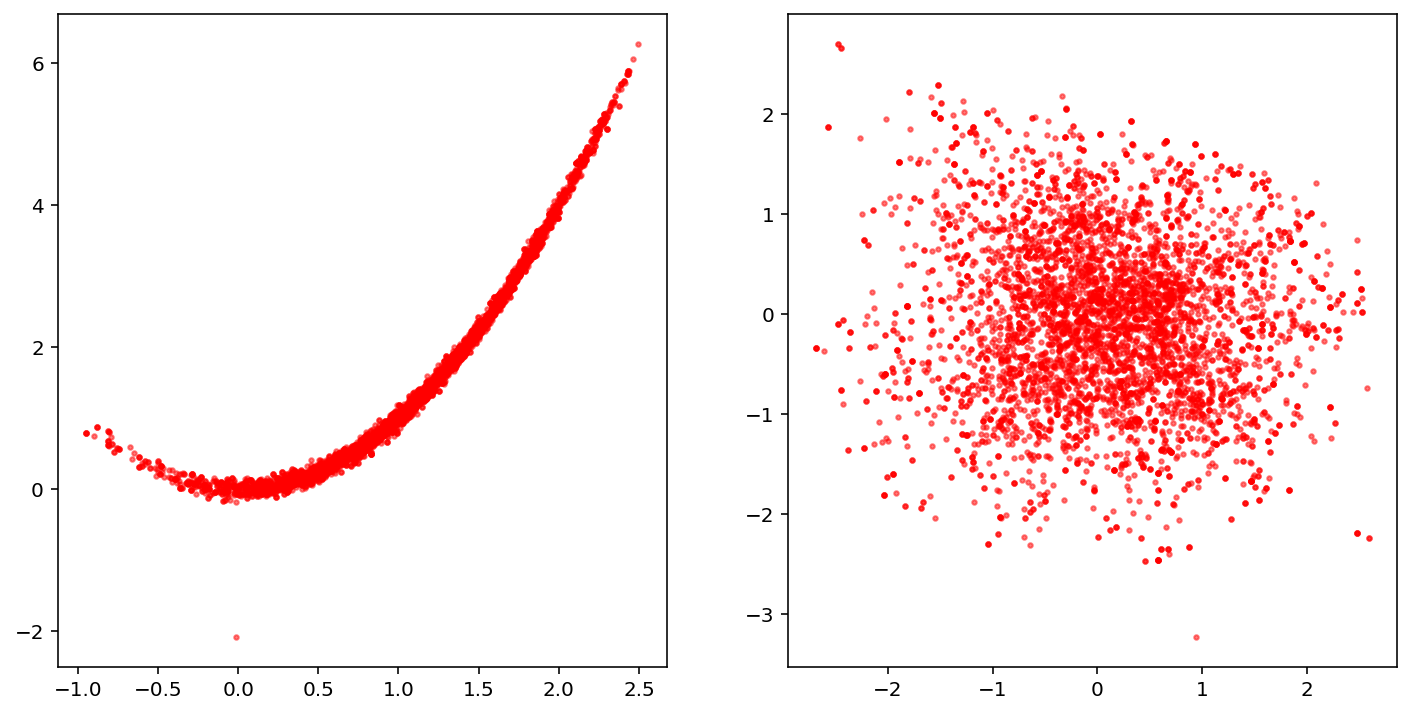

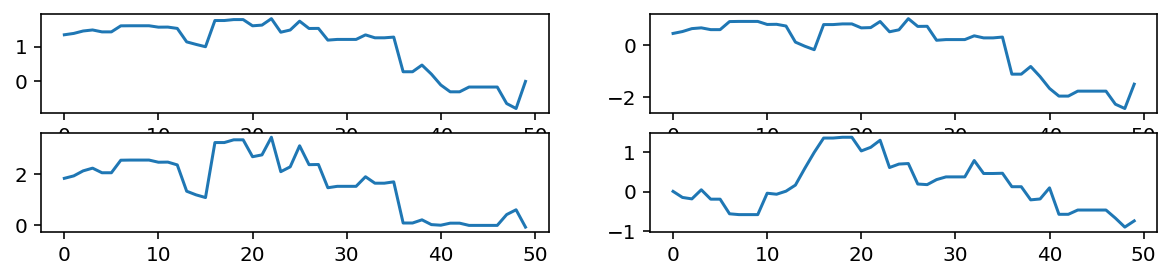

Removed no burn in
235.53291333855273
5100


In [11]:
model = Trainer(like.x_dim, flow='spline', learning_rate=0.001)
test(like, prior, model, init_chain=False, nwalkers=nwalkers, nested_samples=False)